In [1]:
import pandas as pd
from pymongo import MongoClient

import matplotlib.pyplot as plt
import seaborn as sns
import pylab as py 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import boxcox
import numpy as np

Connect to DB

In [2]:
client = MongoClient('localhost', 27017)
db = client['GithubRepo']
Documentation_Record = db['Documentation_Record']

Convert it into pandas dataframe

In [3]:
df = pd.DataFrame(list(Documentation_Record.find()))

print(df.columns)

# drop the _id column
df = df.drop(['_id'], axis=1)

Index(['_id', 'url', 'changes_of_documentation', 'filesize_of_documentation',
       'lines_of_documentation', 'name', 'number_of_documentation', 'owner',
       'popularity', 'popular_level', 'has_license', 'repo_age', 'repo_size',
       'team_size', 'has_code_of_conduct'],
      dtype='object')


In [4]:
df.head(5)

,url,changes_of_documentation,filesize_of_documentation,lines_of_documentation,name,number_of_documentation,owner,popularity,popular_level,has_license,repo_age,repo_size,team_size,has_code_of_conduct
0,https://github.com/emberjs/ember.js,1035,345032,3588,ember.js,11,emberjs,105458627,high,True,4635,96853,30,True
1,https://github.com/CesiumGS/cesium,5395,1048450,13416,cesium,63,CesiumGS,36823334,high,True,4353,804770,18,True
2,https://github.com/meteor/meteor,7617,2891870,49574,meteor,410,meteor,14179484,high,True,4396,161047,14,True
3,https://github.com/bgoonz/BGOONZ_BLOG_2.0,150382,14053538,302970,BGOONZ_BLOG_2.0,396,bgoonz,9132557,high,True,995,2618011,3,True
4,https://github.com/travis-ci/travis-web,63,20399,538,travis-web,5,travis-ci,6569915,high,True,4246,148464,15,True


In [5]:
# seperate df into popular_df and unpopular_df
# use popular_level to seperate
js_popular_df = df[df['popular_level'] == 'high']
js_unpopular_df = df[df['popular_level'] == 'low']

print(js_popular_df.shape)
print(js_unpopular_df.shape)

(60, 14)
(60, 14)


In [6]:
js_popular_df['number_of_documentation'].describe()

count     60.000000
mean      40.483333
std       98.457337
min        1.000000
25%        2.000000
50%        6.000000
75%       25.250000
max      509.000000
Name: number_of_documentation, dtype: float64

In [7]:
js_unpopular_df['number_of_documentation'].describe()

count     60.000000
mean       5.850000
std       30.545784
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      238.000000
Name: number_of_documentation, dtype: float64

Multivariate Linear Model

In [8]:
# Convert has_licence into numeric format
df['has_license_numeric'] = df['has_license'].apply(lambda x: 1 if x == True else 0)

Log-Transformed the number of documentation metrics

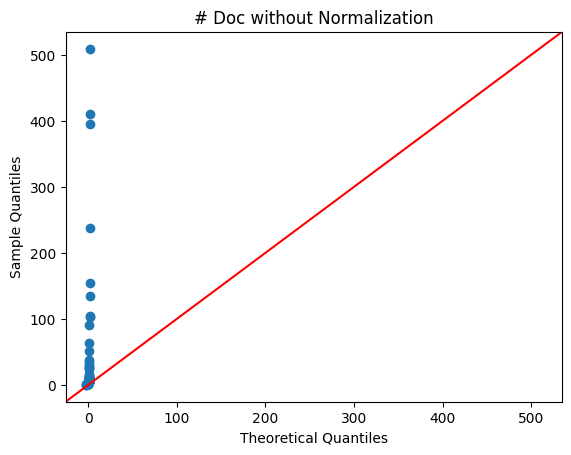

In [9]:
# Q-Q plot before log transformation
for column in ['number_of_documentation']:
    sm.qqplot(df[column], line ='45')
    py.title("# Doc without Normalization")
    py.show()

In [10]:
df['number_of_documentation'] = np.log(df['number_of_documentation'])

/opt/homebrew/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


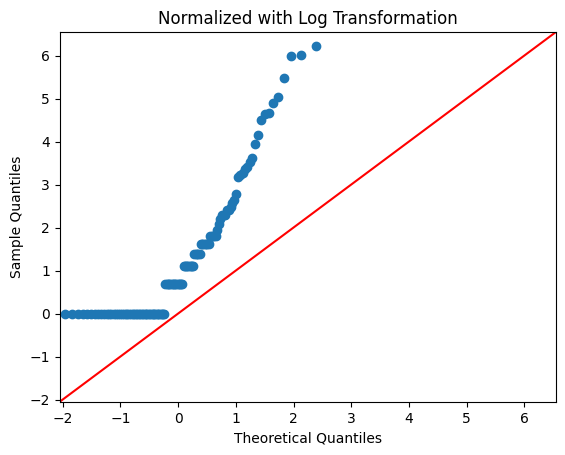

In [11]:
for column in ['number_of_documentation']:
    sm.qqplot(df[column], line ='45')
    py.title("Normalized with Log Transformation")
    py.show()

Cube Root Transformed the number of documentation metrics

In [12]:
df = pd.DataFrame(list(Documentation_Record.find()))

print(df.columns)

# drop the _id column
df = df.drop(['_id'], axis=1)
print(df)

Index(['_id', 'url', 'changes_of_documentation', 'filesize_of_documentation',
       'lines_of_documentation', 'name', 'number_of_documentation', 'owner',
       'popularity', 'popular_level', 'has_license', 'repo_age', 'repo_size',
       'team_size', 'has_code_of_conduct'],
      dtype='object')
                                              url  changes_of_documentation   
0             https://github.com/emberjs/ember.js                      1035  \
1              https://github.com/CesiumGS/cesium                      5395   
2                https://github.com/meteor/meteor                      7617   
3       https://github.com/bgoonz/BGOONZ_BLOG_2.0                    150382   
4         https://github.com/travis-ci/travis-web                        63   
..                                            ...                       ...   
115        https://github.com/teamtant/the-t-list                         9   
116             https://github.com/mococa/ns-chat                    

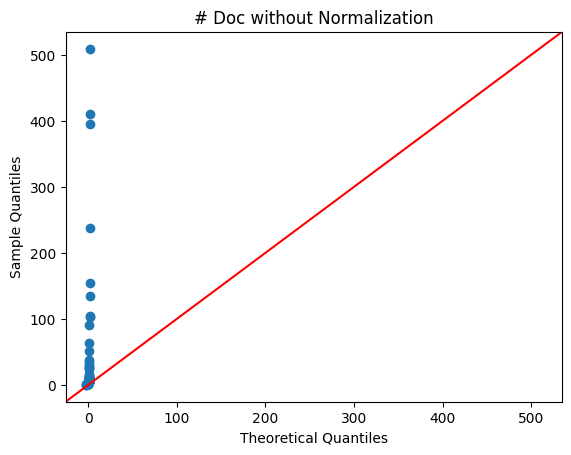

In [13]:
# Q-Q plot before log transformation
for column in ['number_of_documentation']:
    sm.qqplot(df[column], line ='45')
    py.title("# Doc without Normalization")
    py.show()

In [14]:
df['number_of_documentation'] = np.cbrt(df['number_of_documentation'])

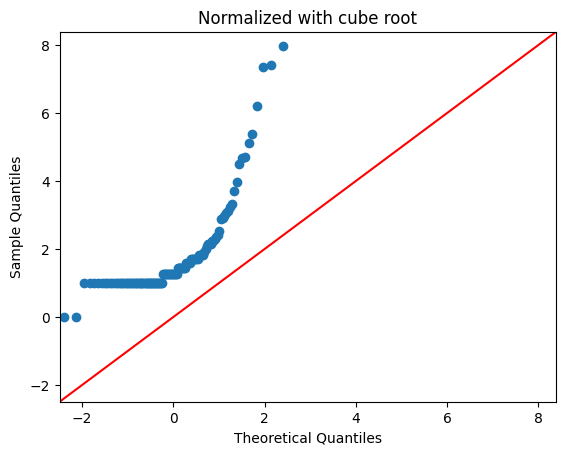

In [15]:
for column in ['number_of_documentation']:
    sm.qqplot(df[column], line ='45')
    py.title("Normalized with cube root")
    py.show()

Square Root Transformation

In [16]:
# re-construct the df
df = pd.DataFrame(list(Documentation_Record.find()))

print(df.columns)

# drop the _id column
df = df.drop(['_id'], axis=1)
print(df)

Index(['_id', 'url', 'changes_of_documentation', 'filesize_of_documentation',
       'lines_of_documentation', 'name', 'number_of_documentation', 'owner',
       'popularity', 'popular_level', 'has_license', 'repo_age', 'repo_size',
       'team_size', 'has_code_of_conduct'],
      dtype='object')
                                              url  changes_of_documentation   
0             https://github.com/emberjs/ember.js                      1035  \
1              https://github.com/CesiumGS/cesium                      5395   
2                https://github.com/meteor/meteor                      7617   
3       https://github.com/bgoonz/BGOONZ_BLOG_2.0                    150382   
4         https://github.com/travis-ci/travis-web                        63   
..                                            ...                       ...   
115        https://github.com/teamtant/the-t-list                         9   
116             https://github.com/mococa/ns-chat                    

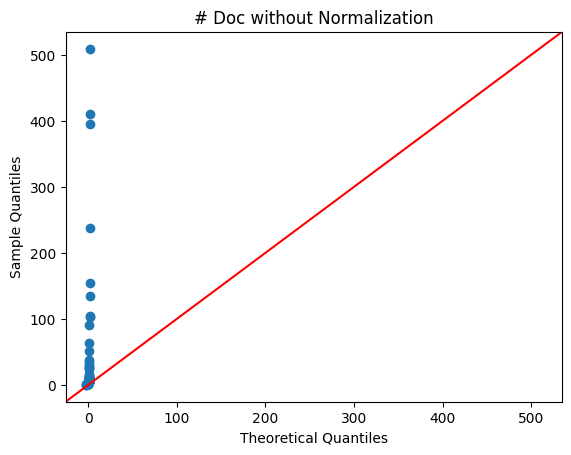

In [17]:
for column in ['number_of_documentation']:
    sm.qqplot(df[column], line ='45')
    py.title("# Doc without Normalization")
    py.show()

In [18]:
df['number_of_documentation'] = np.sqrt(df['number_of_documentation'])

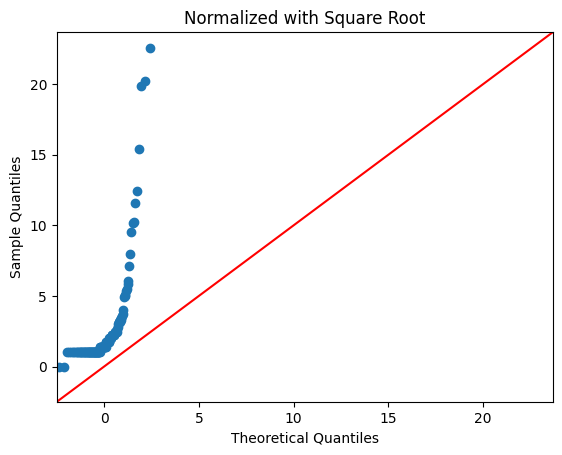

In [19]:
for column in ['number_of_documentation']:
    sm.qqplot(df[column], line ='45')
    py.title("Normalized with Square Root")
    py.show()

Box-Cox Transformation

In [20]:
# re-construct the df
df = pd.DataFrame(list(Documentation_Record.find()))

print(df.columns)

# drop the _id column
df = df.drop(['_id'], axis=1)
print(df)

Index(['_id', 'url', 'changes_of_documentation', 'filesize_of_documentation',
       'lines_of_documentation', 'name', 'number_of_documentation', 'owner',
       'popularity', 'popular_level', 'has_license', 'repo_age', 'repo_size',
       'team_size', 'has_code_of_conduct'],
      dtype='object')
                                              url  changes_of_documentation   
0             https://github.com/emberjs/ember.js                      1035  \
1              https://github.com/CesiumGS/cesium                      5395   
2                https://github.com/meteor/meteor                      7617   
3       https://github.com/bgoonz/BGOONZ_BLOG_2.0                    150382   
4         https://github.com/travis-ci/travis-web                        63   
..                                            ...                       ...   
115        https://github.com/teamtant/the-t-list                         9   
116             https://github.com/mococa/ns-chat                    

In [21]:
# Convert has_licence and has_code_of_conduct into numeric format
df['has_license_numeric'] = df['has_license'].apply(lambda x: 1 if x == True else 0)
df['has_code_of_conduct'] = df['has_code_of_conduct'].apply(lambda x: 1 if x == True else 0)

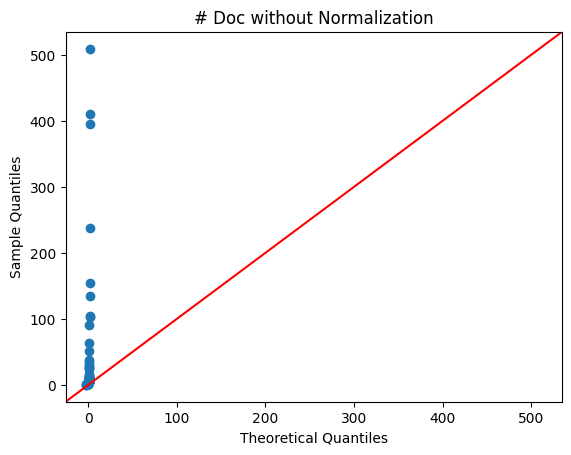

In [22]:
for column in ['number_of_documentation']:
    sm.qqplot(df[column], line ='45')
    py.title("# Doc without Normalization")
    py.show()

In [23]:
df['number_of_documentation'], _ = boxcox(df['number_of_documentation']+1)

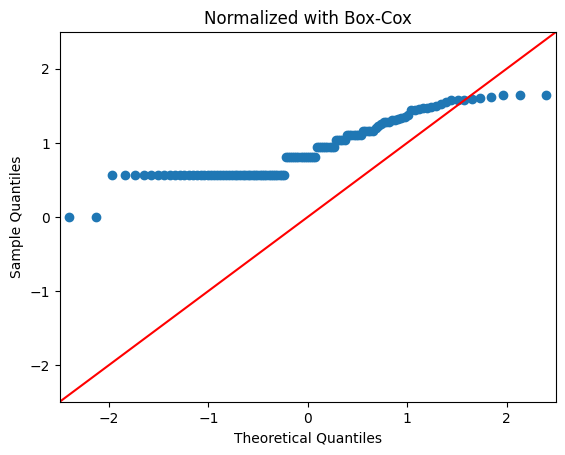

In [24]:
for column in ['number_of_documentation']:
    sm.qqplot(df[column], line ='45')
    py.title("Normalized with Box-Cox")
    py.show()

In [25]:
# # re-construct the df
# df = pd.DataFrame(list(Documentation_Record.find()))

# # drop the _id column
# df = df.drop(['_id'], axis=1)

# fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# for column in ['number_of_documentation']:
#     sm.qqplot(df[column], line ='45', ax=axes[0])
#     axes[0].set_title(f"{column} without Transformation")

# df[f'{column}_box_cox'], _ = boxcox(df['number_of_documentation']+1)

# for column in ['number_of_documentation']:
#     sm.qqplot(df[f'{column}_box_cox'], line ='45', ax=axes[1])
#     axes[1].set_title(f"{column} with Box-Cox Transformation")

# plt.tight_layout()
# plt.show()

Regression Linear Model

In [26]:
# Convert has_licence into numeric format
# df['has_license_numeric'] = df['has_license'].apply(lambda x: 1 if x == True else 0)

In [27]:
# Define the independent variables and add a constant term (for the intercept)
X = df[['number_of_documentation', 'changes_of_documentation', 'lines_of_documentation', 'filesize_of_documentation', 'has_license_numeric', 'has_code_of_conduct']]
X = sm.add_constant(X)

# Define the dependent variable
y = df['popularity']

# Perform the regression
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     6.775
Date:                Fri, 15 Mar 2024   Prob (F-statistic):           3.74e-06
Time:                        13:35:05   Log-Likelihood:                -2088.7
No. Observations:                 120   AIC:                             4191.
Df Residuals:                     113   BIC:                             4211.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

The condition number is large, 4.64e+06. This might indicate that there are strong multicollinearity or other numerical problems.

Plot correlation matrix to visualize

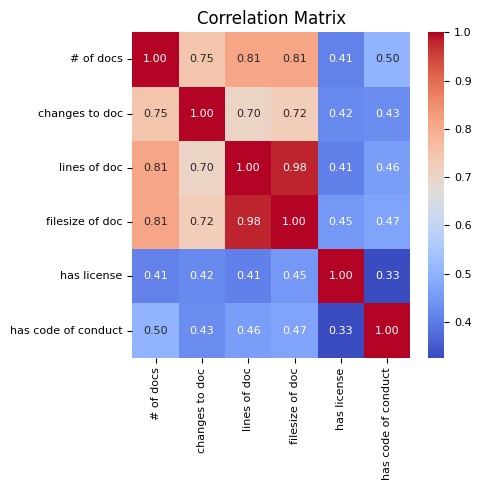

In [28]:
df_corr = df[['number_of_documentation', 'changes_of_documentation', 'lines_of_documentation', 'filesize_of_documentation', 'has_license_numeric', 'has_code_of_conduct']].corr(method='spearman')

# Create a figure without subplots
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# Use seaborn's heatmap function to plot the correlation matrix
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', square=False, ax=ax, annot_kws={"size": 8})

# Set the title of the heatmap
custom_labels = ['# of docs', 'changes to doc', 'lines of doc', 'filesize of doc', 'has license', 'has code of conduct']
ax.set_title('Correlation Matrix')
ax.set_xticklabels(custom_labels, rotation=90, fontsize=8)
ax.set_yticklabels(custom_labels, rotation=0, fontsize=8)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Variance Inflation Factor (VIF)

In [29]:
# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,const,8.388076
1,number_of_documentation,1.673628
2,changes_of_documentation,39.359174
3,lines_of_documentation,812.953541
4,filesize_of_documentation,588.793726
5,has_license_numeric,1.242906
6,has_code_of_conduct,1.509783


Drop changes of doc, lines of doc, and filesize of doc metric

In [30]:
# Define the independent variables and add a constant term (for the intercept)
X = df[['number_of_documentation', 'has_license_numeric', 'has_code_of_conduct']]
X = sm.add_constant(X)

# Define the dependent variable
y = df['popularity']

# Perform the regression
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     3.639
Date:                Fri, 15 Mar 2024   Prob (F-statistic):             0.0149
Time:                        13:35:05   Log-Likelihood:                -2101.7
No. Observations:                 120   AIC:                             4211.
Df Residuals:                     116   BIC:                             4223.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

In [31]:
# Calculating VIF for each variable after removing the highly correlated variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,feature,VIF
0,const,7.662194
1,number_of_documentation,1.492357
2,has_license_numeric,1.240738
3,has_code_of_conduct,1.373895


Negative Binomial Regression

In [32]:
df['repo_age'], _ = boxcox(df['repo_age'])
df['repo_size'], _ = boxcox(df['repo_size'])
df['team_size'], _ = boxcox(df['team_size'])

In [33]:
# Define the independent variables and add a constant term (for the intercept)
X = df[['number_of_documentation', 'has_license_numeric', 'has_code_of_conduct']]
X = sm.add_constant(X)

# Define the dependent variable
y = df['popularity']

# Fit the Negative Binomial Regression model
model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             popularity   No. Observations:                  120
Model:                            GLM   Df Residuals:                      116
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1459.4
Date:                Fri, 15 Mar 2024   Deviance:                       738.80
Time:                        13:35:05   Pearson chi2:                     745.
No. Iterations:                    24   Pseudo R-squ. (CS):             0.9978
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/opt/homebrew/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Let Developer Size, Project Age, and Repo Size as confounding variable

In [34]:
X = df[['number_of_documentation', 'has_license_numeric', 'has_code_of_conduct', 'repo_age', 'repo_size', 'team_size']]
X = sm.add_constant(X)

y = df['popularity']

# Fit the Negative Binomial Regression model with the confounder
model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()

print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             popularity   No. Observations:                  120
Model:                            GLM   Df Residuals:                      113
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1387.8
Date:                Fri, 15 Mar 2024   Deviance:                       595.59
Time:                        13:35:05   Pearson chi2:                     792.
No. Iterations:                    45   Pseudo R-squ. (CS):             0.9993
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/opt/homebrew/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
